In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

# CLIP SHAP data

### Open CLIP SHAP data

In [28]:
clip_shap_maps = pd.read_pickle("xai_output/CLIP_shap_maps.pickle")
clip_shap_maps['model_shap_map'][0]

array([[ 0.20885623,  0.0313803 ,  0.25391841,  0.28997517],
       [-0.12142289,  0.05791771,  0.32769263,  0.33872545],
       [ 0.00814116,  0.27628744, -0.22371328,  0.11881626],
       [ 0.06404245,  0.16504824,  0.27959383,  0.14789307]])

### Normalize

In [29]:
normalized_shap_maps = []

for shap_map in clip_shap_maps['model_shap_map']:
    normalized_map = shap_map / np.sum(shap_map)
    normalized_shap_maps.append(normalized_map)

clip_shap_maps['normalized_shap_map'] = normalized_shap_maps

clip_shap_maps['normalized_shap_map'][0]

array([[ 0.09394599,  0.01411523,  0.11421549,  0.13043424],
       [-0.05461744,  0.02605207,  0.1474    ,  0.15236269],
       [ 0.00366199,  0.12427734, -0.10062887,  0.05344495],
       [ 0.02880705,  0.07424064,  0.12576459,  0.06652404]])

### Average all normalized maps out of curiosity

In [30]:
avg_shap_map = np.mean(np.array(list(clip_shap_maps['normalized_shap_map'])), axis=0)
avg_shap_map

array([[ 0.34082318,  0.05929484,  0.12018789,  0.17630942],
       [-0.15610351,  0.401693  , -0.02732771, -0.15074131],
       [ 0.11555021, -0.22830321, -0.24223715,  0.42676535],
       [-0.0158822 ,  0.41367177, -0.06779122, -0.16590938]])

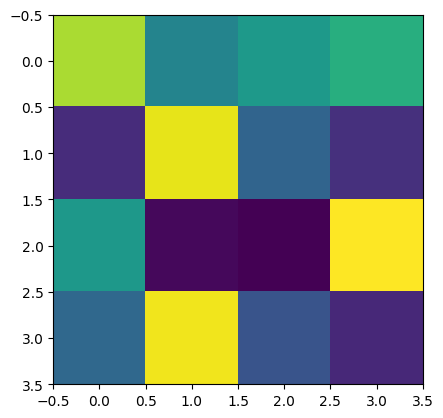

In [31]:
plt.imshow(avg_shap_map) # lighter = higher value

# CLIP output data

In [32]:
clip_valse_output = pd.read_pickle("xai_output/CLIP_all_of_valse_output_scores.pickle")
existence_output = clip_valse_output[clip_valse_output['linguistic_phenomena']=="existence"]
existence_output

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff
535,../../VALSE_data/images/v7w/v7w_2371044.jpg,There are no people in the picture.,There are people in the picture.,existence,20.919865,19.070728,1.849136
536,../../VALSE_data/images/v7w/v7w_2393805.jpg,There are no animals.,There are animals.,existence,18.607960,18.528288,0.079672
537,../../VALSE_data/images/v7w/v7w_713025.jpg,There are no people.,There are people.,existence,17.962276,17.958521,0.003756
538,../../VALSE_data/images/v7w/v7w_2316127.jpg,There are no people.,There are people.,existence,18.183403,19.455202,-1.271799
539,../../VALSE_data/images/v7w/v7w_2327531.jpg,There are no birds pictured.,There are birds pictured.,existence,21.778656,22.230703,-0.452047
...,...,...,...,...,...,...,...
1035,../../VALSE_data/images/v7w/v7w_2371468.jpg,There is a vehicle.,There is no vehicle.,existence,21.509678,21.361858,0.147820
1036,../../VALSE_data/images/v7w/v7w_2371491.jpg,There is a person in the picture.,There is no person in the picture.,existence,19.892363,19.396894,0.495468
1037,../../VALSE_data/images/v7w/v7w_2371495.jpg,There is a person in this picture.,There is no person in this picture.,existence,22.982399,22.580614,0.401785
1038,../../VALSE_data/images/v7w/v7w_2371625.jpg,There is a person.,There is no person.,existence,20.212534,20.071939,0.140594


In [39]:
existence_output[existence_output['model_pred_diff']>=0]

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff
535,../../VALSE_data/images/v7w/v7w_2371044.jpg,There are no people in the picture.,There are people in the picture.,existence,20.919865,19.070728,1.849136
536,../../VALSE_data/images/v7w/v7w_2393805.jpg,There are no animals.,There are animals.,existence,18.607960,18.528288,0.079672
537,../../VALSE_data/images/v7w/v7w_713025.jpg,There are no people.,There are people.,existence,17.962276,17.958521,0.003756
540,../../VALSE_data/images/v7w/v7w_2330133.jpg,There are no dogs.,There are dogs.,existence,22.372826,21.268599,1.104227
541,../../VALSE_data/images/v7w/v7w_2338349.jpg,There are no animals.,There are animals.,existence,17.272308,16.973381,0.298927
...,...,...,...,...,...,...,...
1033,../../VALSE_data/images/v7w/v7w_2371067.jpg,There is a skater.,There is no skater.,existence,27.371325,25.820061,1.551264
1035,../../VALSE_data/images/v7w/v7w_2371468.jpg,There is a vehicle.,There is no vehicle.,existence,21.509678,21.361858,0.147820
1036,../../VALSE_data/images/v7w/v7w_2371491.jpg,There is a person in the picture.,There is no person in the picture.,existence,19.892363,19.396894,0.495468
1037,../../VALSE_data/images/v7w/v7w_2371495.jpg,There is a person in this picture.,There is no person in this picture.,existence,22.982399,22.580614,0.401785


In [40]:
# check rate of correct "existence" outputs
349/505

0.691089108910891

This more or less matches expectations from the Bugliarelo paper

# BLIP

### Output data

In [3]:
blip_df = pd.read_pickle("xai_output/BLIP_all_of_valse_output_scores.pickle")
blip_df

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff
0,../../VALSE_data/images/coco2017/000000462576.jpg,Breakfast items including juice are on the table.,Breakfast items including juice are off the ta...,relations,0.217035,0.262687,-0.045652
1,../../VALSE_data/images/coco2017/000000294162.jpg,The white laptop is turned off but left open.,The white laptop is turned on but left open.,relations,0.546468,0.540692,0.005776
2,../../VALSE_data/images/coco2017/000000144333.jpg,a girl is sitting on a bicycle outside,A girl is sitting behind a bicycle outside,relations,-0.029270,0.002736,-0.032006
3,../../VALSE_data/images/coco2017/000000181666.jpg,The nomadic sheepherd walks behind a large gro...,The nomadic sheepherd walks on a large group o...,relations,0.350502,0.358716,-0.008215
4,../../VALSE_data/images/coco2017/000000482436.jpg,The woman in the diner and the man looking int...,The woman outside the diner and the man lookin...,relations,0.085504,0.112857,-0.027353
...,...,...,...,...,...,...,...
2632,../../VALSE_data/images/swig/driving_253.jpg,A man drives a trailer truck.,A trailer truck drives past a man.,actions,0.135146,0.004775,0.130371
2633,../../VALSE_data/images/swig/cooking_66.jpg,A man cooks a turkey.,A turkey cooks a man.,actions,-0.479173,-0.476247,-0.002926
2634,../../VALSE_data/images/swig/sitting_228.jpg,A woman sits at the piano.,A piano sits beside a woman.,actions,0.108748,0.067868,0.040881
2635,../../VALSE_data/images/swig/gnawing_178.jpg,A man gnaws meat.,A meat gnaws man.,actions,-0.049891,-0.074194,0.024302


In [5]:
blip_df[blip_df['model_pred_diff']<0]

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff
0,../../VALSE_data/images/coco2017/000000462576.jpg,Breakfast items including juice are on the table.,Breakfast items including juice are off the ta...,relations,0.217035,0.262687,-0.045652
2,../../VALSE_data/images/coco2017/000000144333.jpg,a girl is sitting on a bicycle outside,A girl is sitting behind a bicycle outside,relations,-0.029270,0.002736,-0.032006
3,../../VALSE_data/images/coco2017/000000181666.jpg,The nomadic sheepherd walks behind a large gro...,The nomadic sheepherd walks on a large group o...,relations,0.350502,0.358716,-0.008215
4,../../VALSE_data/images/coco2017/000000482436.jpg,The woman in the diner and the man looking int...,The woman outside the diner and the man lookin...,relations,0.085504,0.112857,-0.027353
6,../../VALSE_data/images/coco2017/000000337055.jpg,a woman with a tattoo is sitting on the train ...,A woman with a tattoo is sitting behind the tr...,relations,-0.381723,-0.288022,-0.093701
...,...,...,...,...,...,...,...
2627,../../VALSE_data/images/swig/gnawing_359.jpg,A baby gnaws in a crib.,A crib gnaws a baby.,actions,-0.533082,-0.507126,-0.025956
2628,../../VALSE_data/images/swig/stumbling_49.jpg,A woman stumbles down the stairs.,The stairs stumble toward a woman.,actions,-0.252820,-0.058311,-0.194509
2630,../../VALSE_data/images/swig/recovering_160.jpg,A woman recovers from the childbirth.,A childbirth recovers the woman.,actions,0.372108,0.639793,-0.267685
2633,../../VALSE_data/images/swig/cooking_66.jpg,A man cooks a turkey.,A turkey cooks a man.,actions,-0.479173,-0.476247,-0.002926


# FLAVA

In [7]:
df = pd.read_pickle("xai_output/FLAVA_all_of_valse_output_scores.pickle")

df.head(1)

,img_path,caption,foil,linguistic_phenomena,model_pred_caption,model_pred_foil,model_pred_diff
0,../../VALSE_data/images/coco2017/000000462576.jpg,Breakfast items including juice are on the table.,Breakfast items including juice are off the ta...,relations,17.166475,18.707315,-1.54084


In [10]:
len(df[df['model_pred_diff']>0])/len(df)

0.6723549488054608